In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

csv_dataset = pd.read_csv(r"C:\Users\Chaitra\Desktop\hospital_admissions.csv")


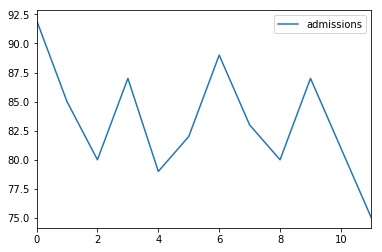

In [3]:
csv_dataset.plot()
plt.show()

In [4]:
optimal_n = None
best_mse = None
db = csv_dataset.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("MSE = %s" % mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
print("Optimal n = %s" % optimal_n)

MSE = [17.99999887 24.6328125  24.92571524 21.48610899]
Best MSE = 17.99999886972364
Optimal n = 3


In [5]:
print("MA = %s" % np.mean(db[:, 0][len(db) - optimal_n:len(db)]))

MA = 81.0


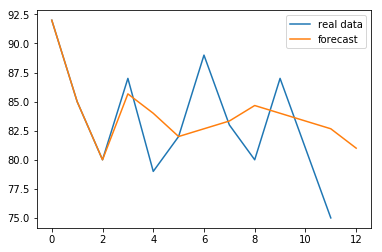

In [6]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()